# Exploratory Data Analysis (EDA) - Rossmann Stores

In this notebook, we explore and visualize the cleaned dataset of **Rossmann Stores** in order to uncover hidden patterns, relationships, and trends that may support our predictive modeling and business understanding.

The goal of this analysis is to gain insights into the behavior of **store sales**, how different features (e.g., promotions, holidays, customers, store type) affect performance, and to identify any interesting correlations or anomalies.

We will use a combination of:
- **Static visualizations** using Matplotlib and Seaborn.
- **Interactive charts** using Plotly for deeper exploration.

This step is essential for informing the next stages of the project, including **feature engineering**, **model building**, and generating meaningful **business recommendations**.

### Importing required libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Static data visualization
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

# Interactive data visualization
import plotly.express as px
import plotly.graph_objects as go

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
# Reading the dataset from a CSV file
df = pd.read_csv(r"C:\Users\momer\0 Data Science\Rossmann_DEPI_Project\Notebooks\clean_data.csv")
df.head()# Display the first 5 rows of the dataset to check its structure

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,compyear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,is_test,Year,Month,Day,Day_name
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,c,...,2008.0,0,0.0,0.0,noPromo,False,2015,7,31,Friday
1,1,4,2015-07-30,5020.0,546.0,1.0,1,0,1,c,...,2008.0,0,0.0,0.0,noPromo,False,2015,7,30,Thursday
2,1,3,2015-07-29,4782.0,523.0,1.0,1,0,1,c,...,2008.0,0,0.0,0.0,noPromo,False,2015,7,29,Wednesday
3,1,2,2015-07-28,5011.0,560.0,1.0,1,0,1,c,...,2008.0,0,0.0,0.0,noPromo,False,2015,7,28,Tuesday
4,1,1,2015-07-27,6102.0,612.0,1.0,1,0,1,c,...,2008.0,0,0.0,0.0,noPromo,False,2015,7,27,Monday


### Monthly total sales by store type

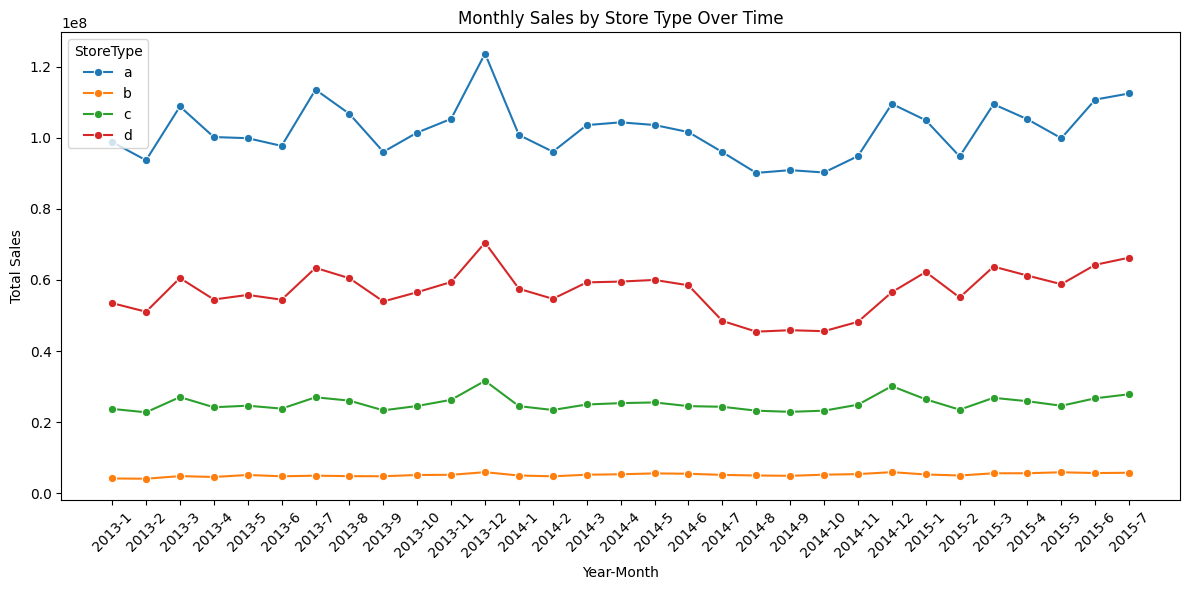

In [3]:
monthly_store_sales = df.groupby(['Year', 'Month', 'StoreType'])['Sales'].sum().reset_index()
monthly_store_sales['Year-Month'] = monthly_store_sales['Year'].astype(str) + '-' + monthly_store_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_store_sales,
    x='Year-Month',
    y='Sales',
    hue='StoreType',
    marker='o'
)
plt.title('Monthly Sales by Store Type Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly total sales overall

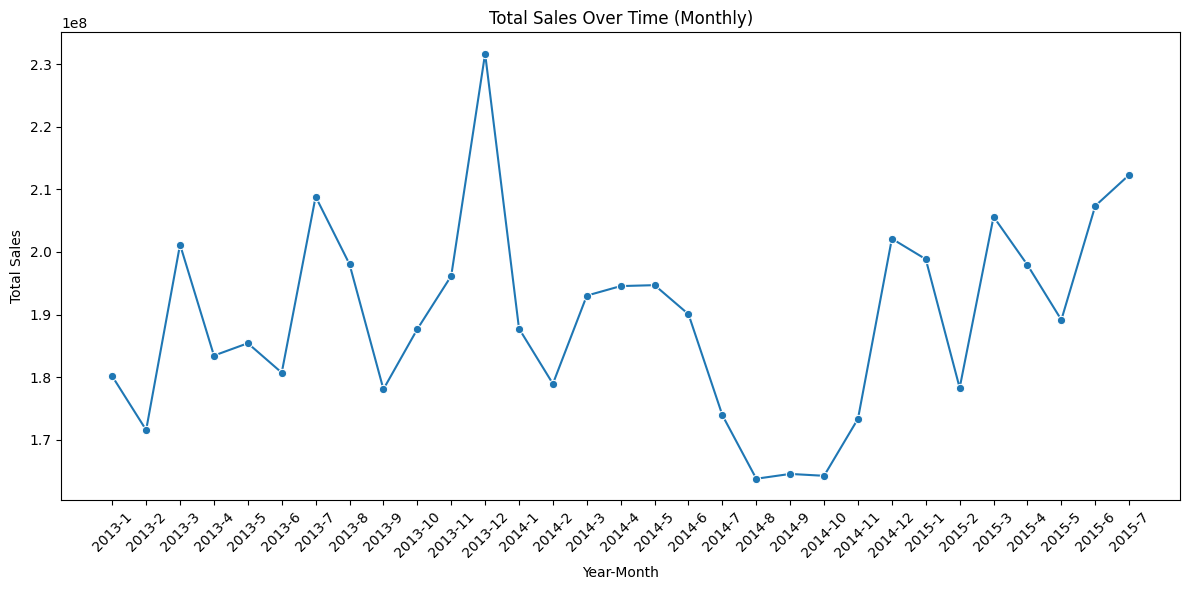

In [4]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_sales,
    x='Year-Month',
    y='Sales',
    marker='o'
)
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly average sales

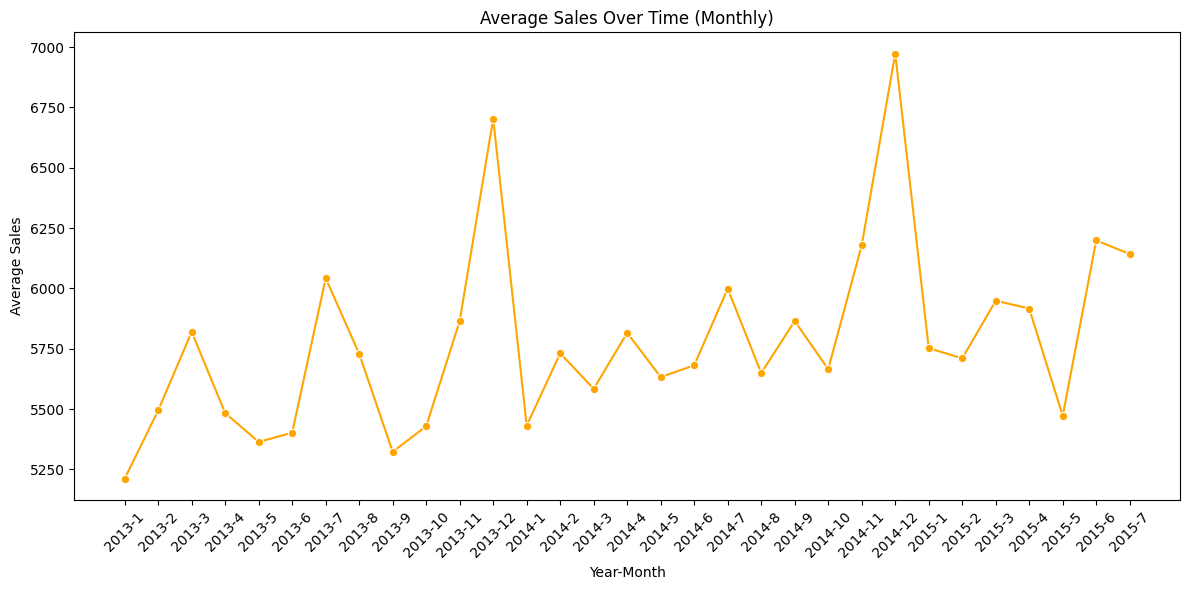

In [5]:
monthly_avg_sales = df.groupby(['Year', 'Month'])['Sales'].mean().reset_index()
monthly_avg_sales['Year-Month'] = monthly_avg_sales['Year'].astype(str) + '-' + monthly_avg_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_avg_sales,
    x='Year-Month',
    y='Sales',
    marker='o',
    color='orange'
)
plt.title('Average Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sales trend by Promo2 status

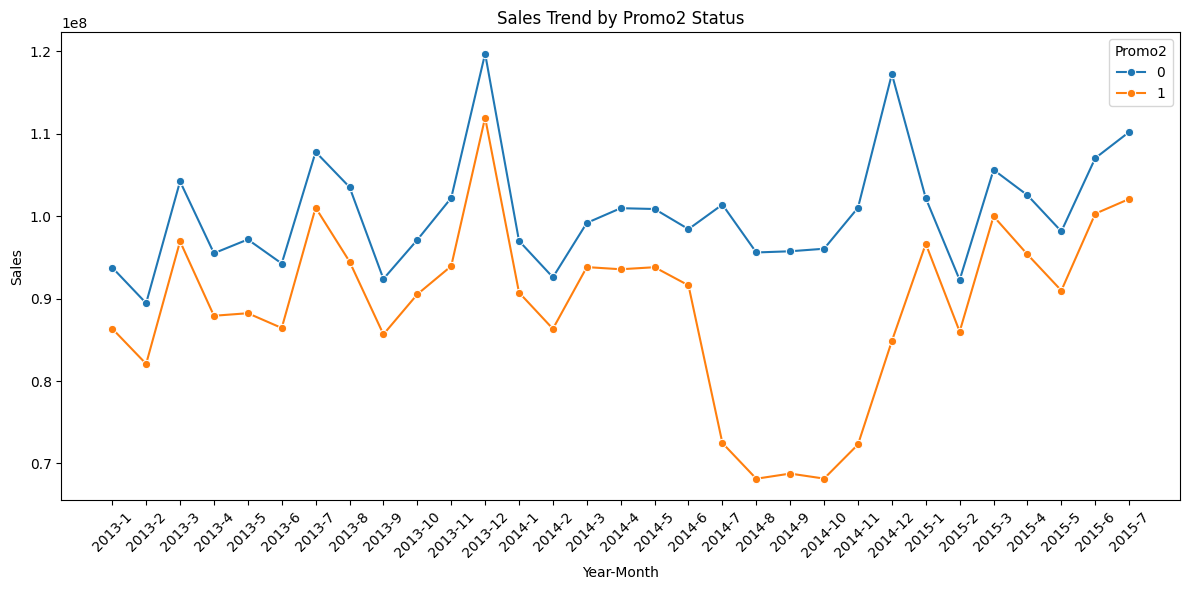

In [6]:
monthly_promo2 = df.groupby(['Year', 'Month', 'Promo2'])['Sales'].sum().reset_index()
monthly_promo2['Year-Month'] = monthly_promo2['Year'].astype(str) + '-' + monthly_promo2['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_promo2,
    x='Year-Month',
    y='Sales',
    hue='Promo2',
    marker='o'
)
plt.title('Sales Trend by Promo2 Status')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average sales by day of the week

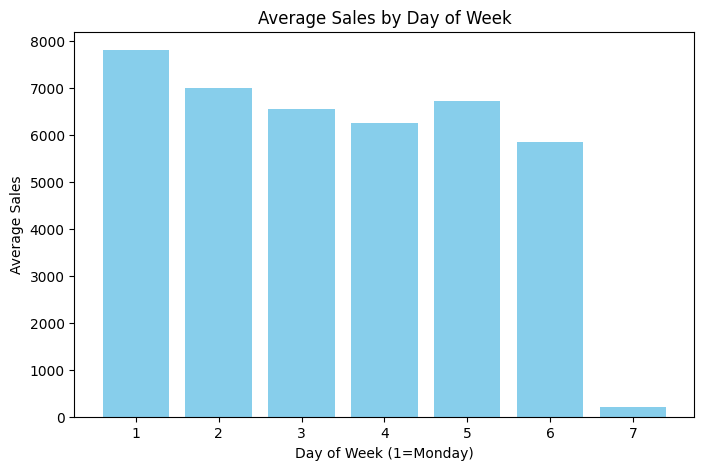

In [7]:
avg_sales_day = df.groupby('DayOfWeek')['Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(avg_sales_day['DayOfWeek'], avg_sales_day['Sales'], color='skyblue')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (1=Monday)')
plt.ylabel('Average Sales')
plt.xticks(avg_sales_day['DayOfWeek'])
plt.show()

### Boxplot: Sales distribution by store type

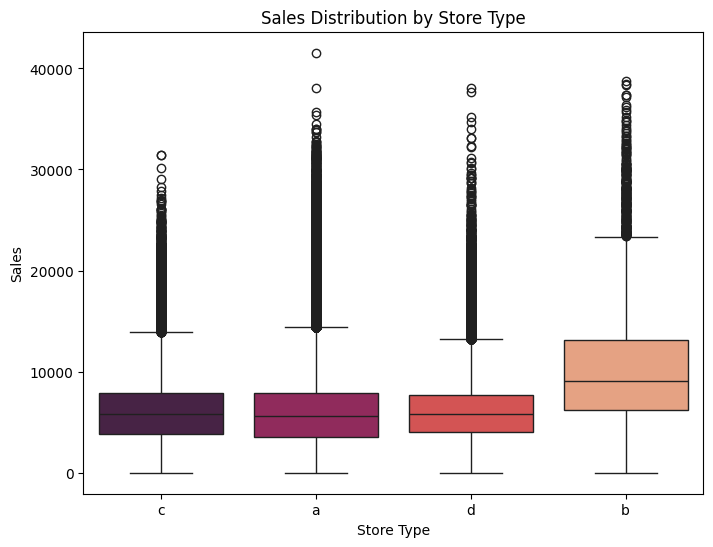

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='StoreType', y='Sales', palette='rocket')
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

### Boxplot: Sales distribution by Promo

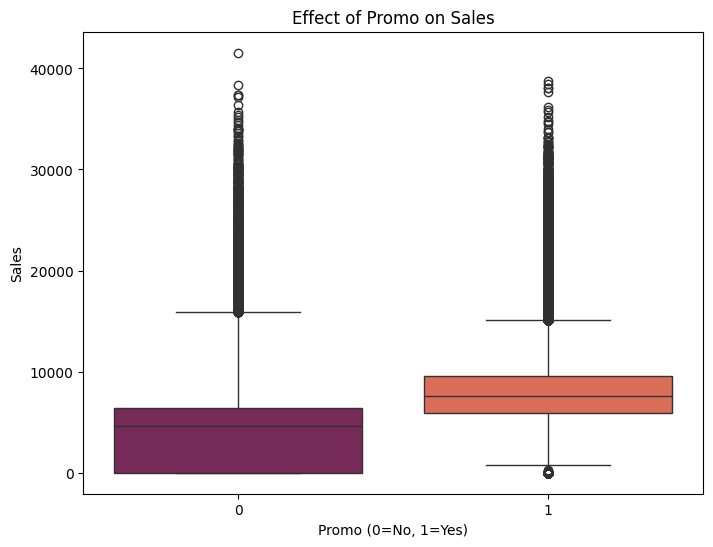

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Promo', y='Sales', palette='rocket')
plt.title('Effect of Promo on Sales')
plt.xlabel('Promo (0=No, 1=Yes)')
plt.ylabel('Sales')
plt.show()

### Average sales by state holiday

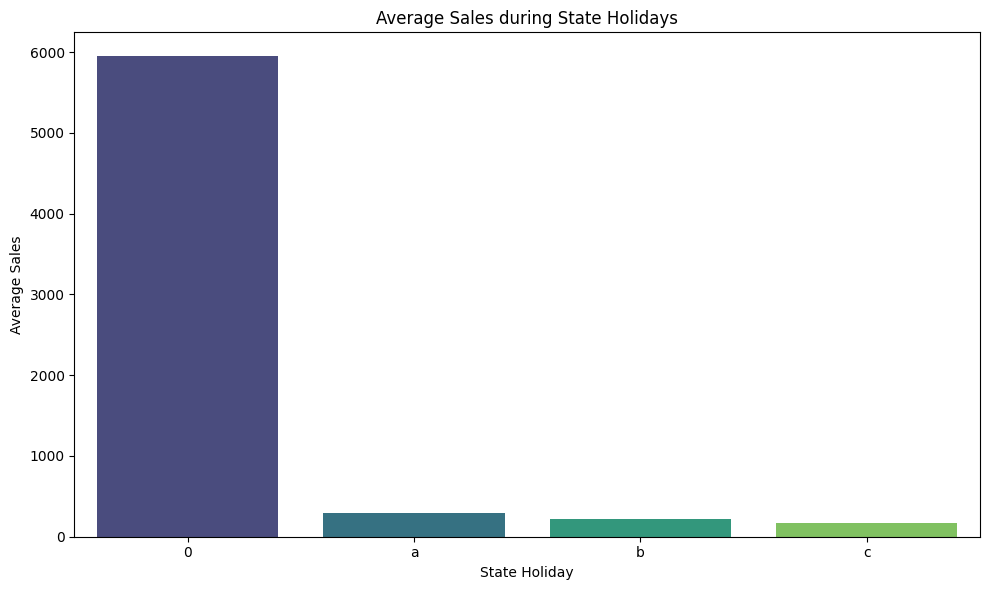

In [10]:
avg_sales_holiday = df.groupby('StateHoliday')['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_sales_holiday,
    x='StateHoliday',
    y='Sales',
    palette='viridis'
)
plt.title('Average Sales during State Holidays')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

### Scatter plot: Customers vs Sales

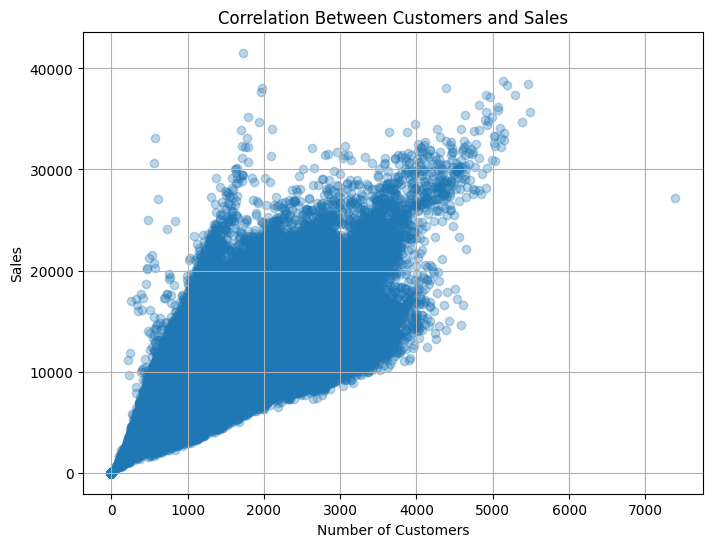

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['Customers'], df['Sales'], alpha=0.3)
plt.title('Correlation Between Customers and Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Monthly average sales for sample stores

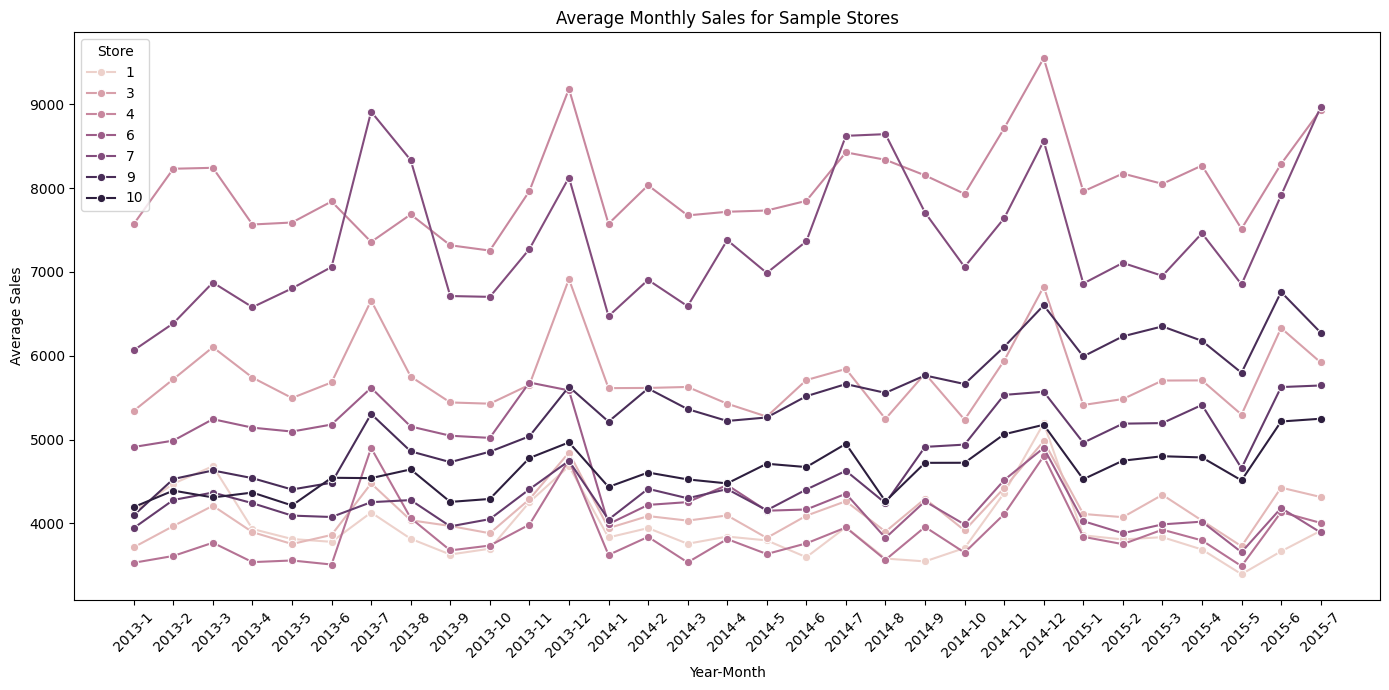

In [12]:
monthly_store_avg = df.groupby(['Year', 'Month', 'Store'])['Sales'].mean().reset_index()
monthly_store_avg['Year-Month'] = monthly_store_avg['Year'].astype(str) + '-' + monthly_store_avg['Month'].astype(str)

sample_stores = monthly_store_avg['Store'].unique()[:10]
filtered_data = monthly_store_avg[monthly_store_avg['Store'].isin(sample_stores)]

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=filtered_data,
    x='Year-Month',
    y='Sales',
    hue='Store',
    marker='o'
)
plt.title('Average Monthly Sales for Sample Stores')
plt.xlabel('Year-Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Store')
plt.tight_layout()
plt.show()

### Boxplot: Effect of school holidays on sales

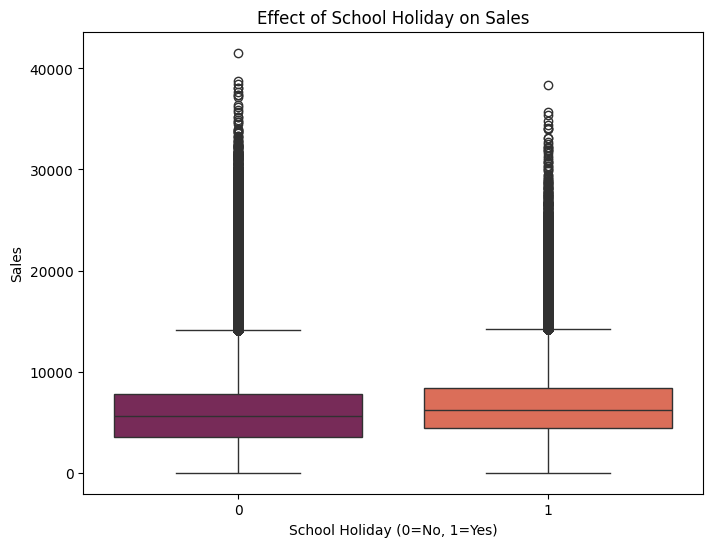

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SchoolHoliday', palette='rocket', y='Sales')
plt.title('Effect of School Holiday on Sales')
plt.xlabel('School Holiday (0=No, 1=Yes)')
plt.ylabel('Sales')
plt.show()

### Average sales by day of week and store type

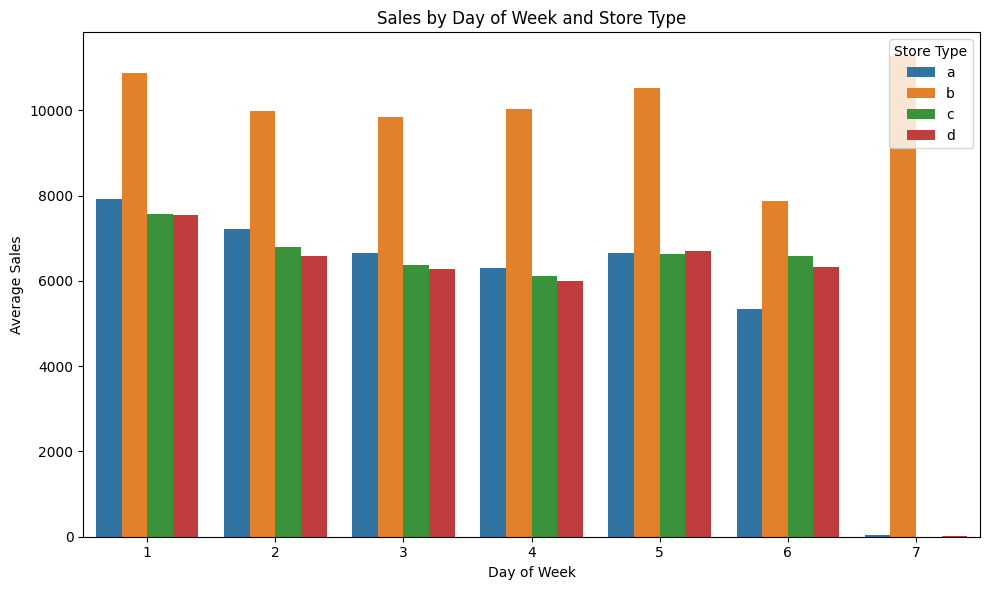

In [14]:

dayofweek_store_sales = df.groupby(['DayOfWeek', 'StoreType'])['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=dayofweek_store_sales,
    x='DayOfWeek',
    y='Sales',
    hue='StoreType'
)
plt.title('Sales by Day of Week and Store Type')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

### Sales trend by day of week over time

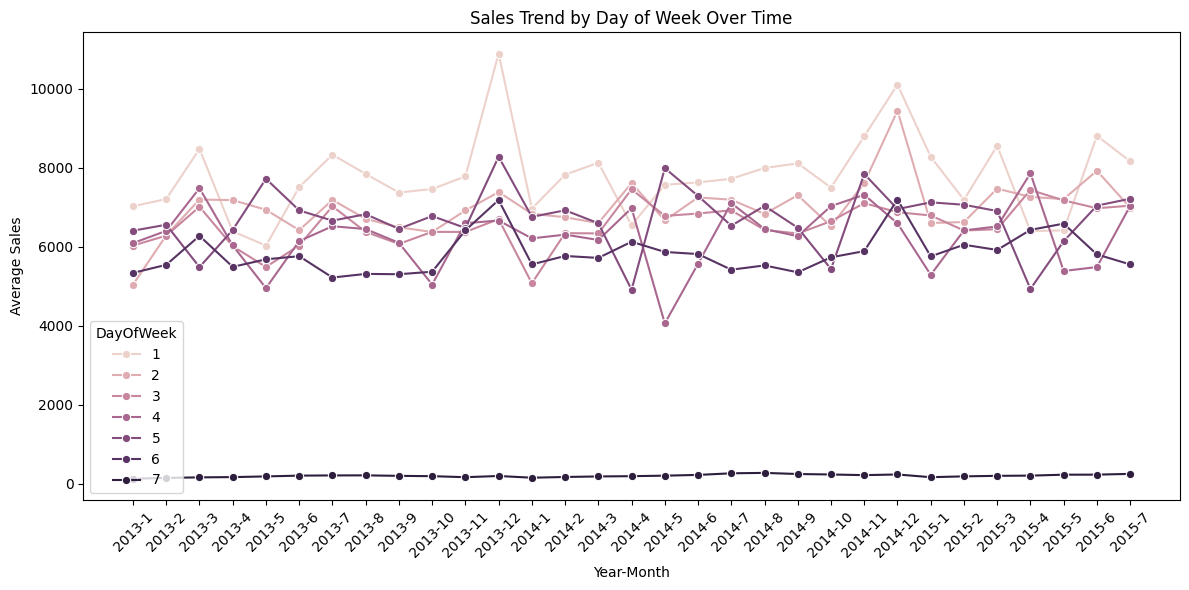

In [15]:
dayofweek_sales = df.groupby(['Year', 'Month', 'DayOfWeek'])['Sales'].mean().reset_index()
dayofweek_sales['Year-Month'] = dayofweek_sales['Year'].astype(str) + '-' + dayofweek_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=dayofweek_sales,
    x='Year-Month',
    y='Sales',
    hue='DayOfWeek',
    marker='o'
)
plt.title('Sales Trend by Day of Week Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Daily total sales

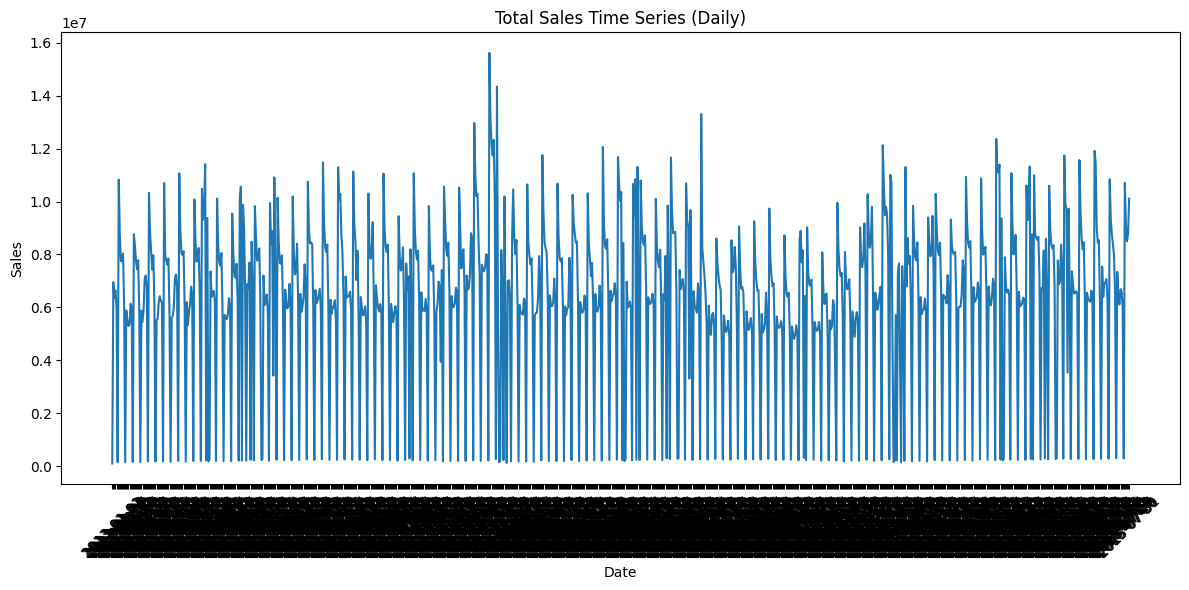

In [16]:
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Date', y='Sales')
plt.title('Total Sales Time Series (Daily)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation heatmap

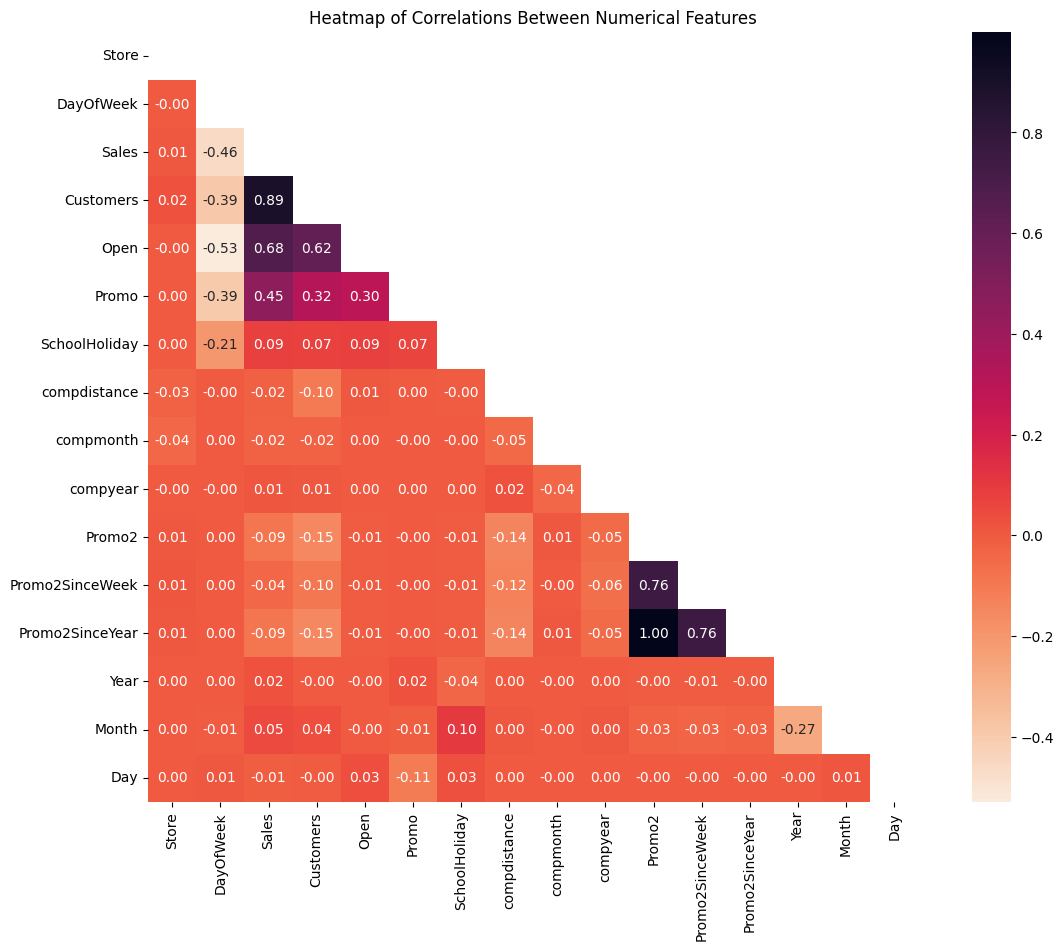

In [17]:
corr = df.select_dtypes(include=['float64', 'int64', 'int32']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    cmap='rocket_r', square=True
)
plt.title('Heatmap of Correlations Between Numerical Features')
plt.show()

## Financial Suggestions Based on Data Analysis

- Focus on identifying and addressing missing data patterns to improve data quality and reliability for better decision-making.
- Analyze customer behavior trends during holidays and promotional periods to optimize store operations and marketing campaigns.
- Investigate the impact of store competition distance (`compdistance`) on sales to develop localized marketing strategies.
- Examine the performance differences between various store types (`StoreType`) and product assortments (`Assortment`) to tailor inventory and promotions accordingly.
- Utilize insights from sales and customer counts over different days of the week and months to plan staffing and inventory levels effectively.
- Monitor open and closed store days to understand their effect on sales fluctuations and adapt business hours if necessary.
- Review the effectiveness of promotional intervals (`PromoInterval`) and long-term promotions (`Promo2`) in driving customer engagement and sales.
- Explore the effect of school holidays and state holidays on customer footfall and sales volume to improve seasonal planning.
- Leverage visualization insights to communicate key trends and anomalies to stakeholders for informed business decisions.